In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 41.5 MB/s eta 0:00:00


In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import zipfile

# Đường dẫn đầy đủ đến file zip
zip_file_path = '/content/drive/MyDrive/Train_YOLOv8/data/train/data_Traffic_Sign_YOLOv8.zip'

# Giải nén file .zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Train_YOLOv8/data/train')

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco8.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

In [ ]:
# Chuyển đến thư mục làm việc
%cd /content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8
# Xóa file mydataset.yaml nếu có
if os.path.exists("data/mydataset.yaml"):
    os.remove("data/mydataset.yaml")
# Ghi dữ liệu vào file mydataset.yaml
class_names = [
    'Pedestrian Crossing',
    'Equal-level Intersection',
    'No Entry',
    'Right Turn Only',
    'Intersection',
    'Intersection with Uncontrolled Road',
    'Dangerous Turn',
    'No Left Turn',
    'Bus Stop',
    'Roundabout',
    'No Stopping and No Parking',
    'U-Turn Allowed',
    'Lane Allocation',
    'No Left Turn for Motorcycles',
    'Slow Down',
    'No Trucks Allowed',
    'Narrow Road on the Right',
    'No Passenger Cars and Trucks',
    'Height Limit',
    'No U-Turn',
    'No U-Turn and No Right Turn',
    'No Cars Allowed',
    'Narrow Road on the Left',
    'Uneven Road',
    'No Two or Three-wheeled Vehicles',
    'Customs Checkpoint',
    'Motorcycles Only',
    'Obstacle on the Road',
    'Children Present',
    'Trucks and Containers',
    'No Motorcycles Allowed',
    'Trucks Only',
    'Road with Surveillance Camera',
    'No Right Turn',
    'Series of Dangerous Turns',
    'No Containers Allowed',
    'No Left or Right Turn',
    'No Straight and Right Turn',
    'Intersection with T-Junction',
    'Speed limit (50km/h)',
    'Speed limit (60km/h)',
    'Speed limit (80km/h)',
    'Speed limit (40km/h)',
    'Left Turn',
    'Low Clearance',
    'Other Danger',
    'Go Straight',
    'No Parking',
    'Containers Only',
    'No U-Turn for Cars',
    'Level Crossing with Barriers'
]
with open("data/mydataset.yaml", "w") as f:
    f.write("train: '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train'\n")
    f.write("val: '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train'\n")
    f.write("nc: 51\n")
    f.write(f"names: {class_names}\n")

/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8


In [ ]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

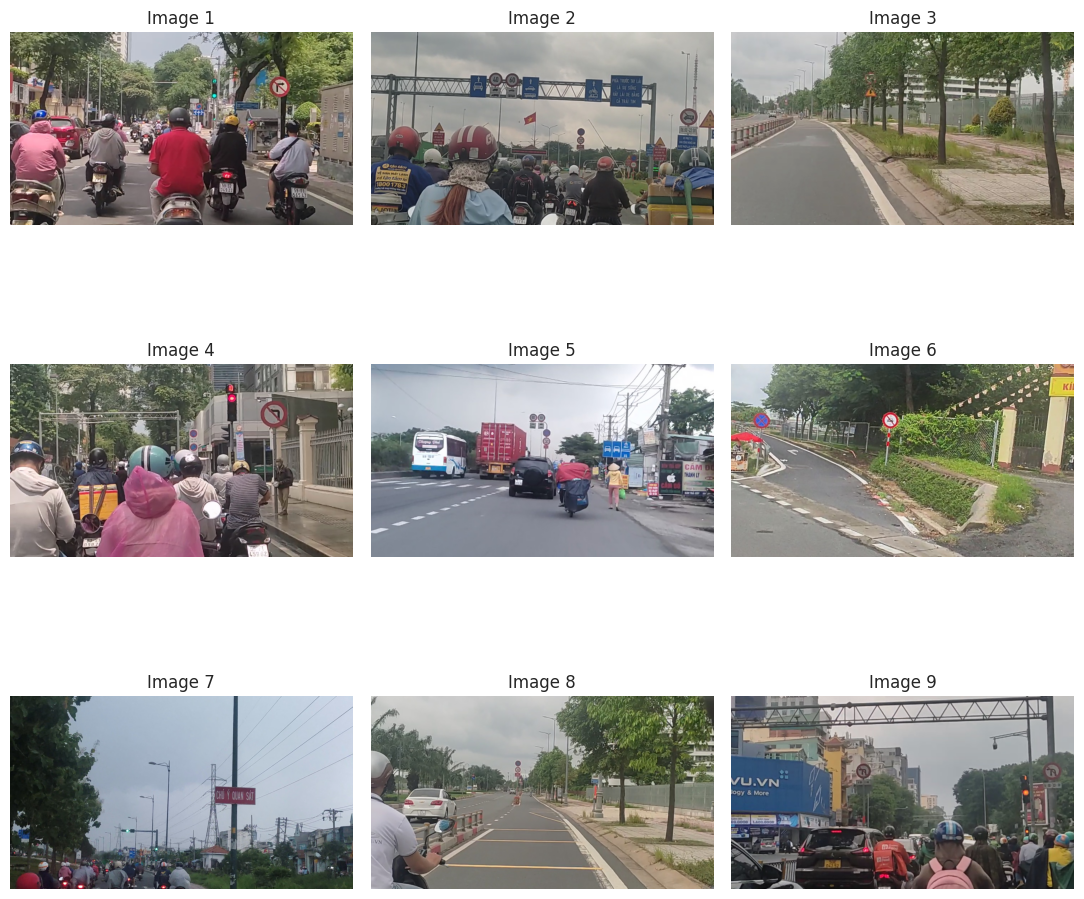

In [ ]:
# Đặt đường dẫn đến thư mục chứa hình ảnh trên Google Drive
Image_dir = '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
image = cv2.imread("/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/images/1000.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 960x540 and 3 channels.



image 1/1 /content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/images/0200.jpg: 384x640 2 persons, 1 motorcycle, 1 truck, 1 stop sign, 301.6ms
Speed: 13.2ms preprocess, 301.6ms inference, 30.5ms postprocess per image at shape (1, 3, 384, 640)


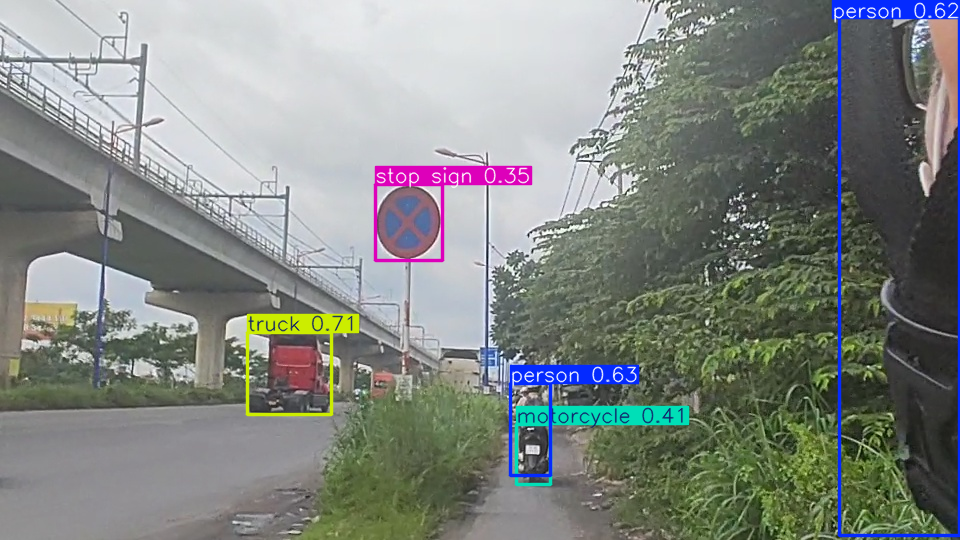

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/images/0200.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 MB 11.6 MB/s eta 0:00:00


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/mydataset.yaml",
                                       epochs = 5, batch = -1, optimizer = 'auto')

In [ ]:
# Hàm để lấy danh sách các tệp trong thư mục
def get_files_in_directory(directory):
    return [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# Đọc danh sách các hình ảnh đã được train trước đó từ tệp văn bản
trained_file_path = '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/trained_files.txt'
if os.path.exists(trained_file_path):
    with open(trained_file_path, 'r') as file:
        trained_files = file.read().splitlines()
else:
    trained_files = []

# Lấy danh sách các hình ảnh mới từ thư mục dữ liệu huấn luyện
train_images_dir = '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/images'
train_files = get_files_in_directory(train_images_dir)

# Lọc bỏ những hình ảnh đã được train
files_to_train = [f for f in train_files if f not in trained_files]

# Cập nhật danh sách các hình ảnh đã được train
with open(trained_file_path, 'a') as file:
    for f in files_to_train:
        file.write(f + '\n')

# Chạy quá trình huấn luyện trên các hình ảnh mới
Final_model = YOLO('yolov8n.pt')
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/mydataset.yaml", epochs=5, batch=-1, optimizer='auto')


Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/mydataset.yaml, epochs=5, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

100%|██████████| 755k/755k [00:00<00:00, 9.95MB/s]


Overriding model.yaml nc=80 with nc=51

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/labels... 3216 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3216/3216 [25:36<00:00,  2.09it/s]


train: New cache created: /content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/labels.cache... 3216 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3216/3216 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000182, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.301      5.105     0.9528         94        640: 100%|██████████| 201/201 [48:05<00:00, 14.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [10:28<00:00,  6.22s/it]


                   all       3216       8341       0.42     0.0972     0.0599      0.044

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.199      3.461     0.8985         72        640: 100%|██████████| 201/201 [45:56<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [10:34<00:00,  6.28s/it]


                   all       3216       8341      0.432      0.202      0.156       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.162      3.123     0.9222         76        640:  12%|█▏        | 24/201 [05:24<39:38, 13.44s/it]

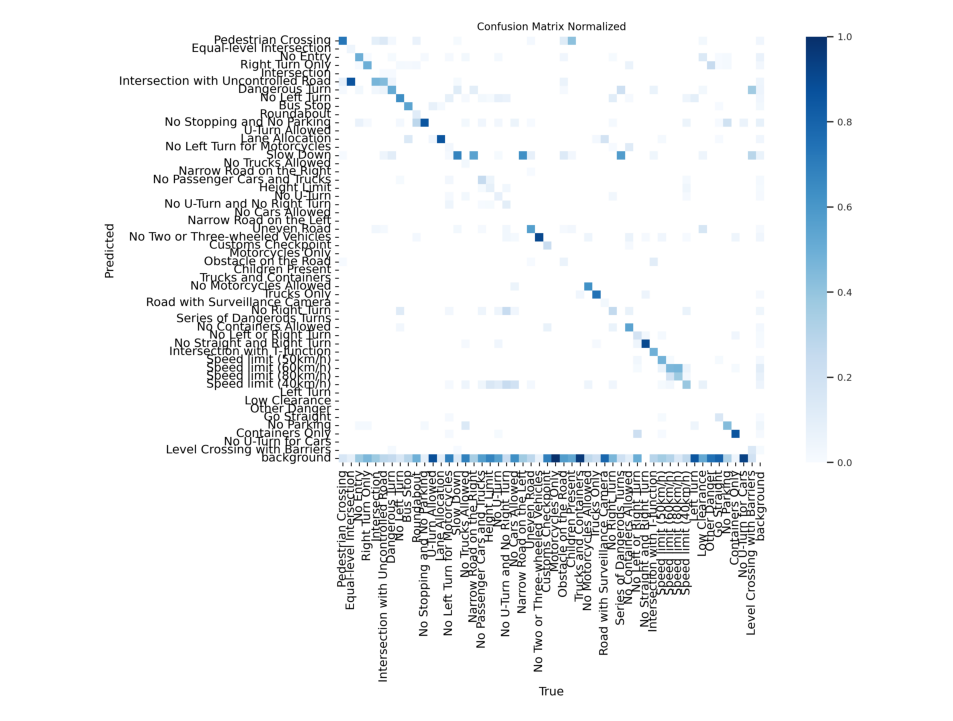

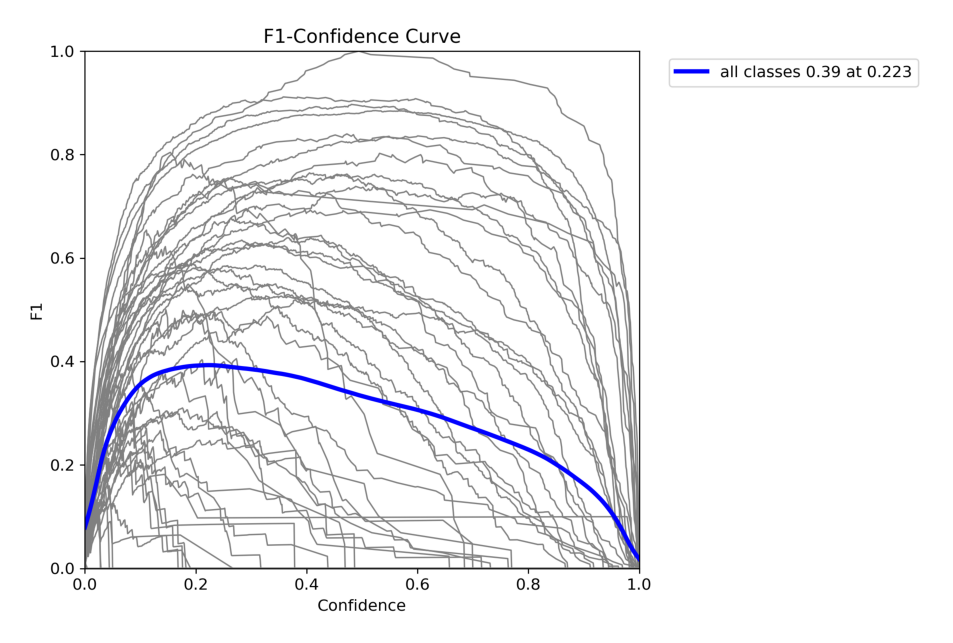

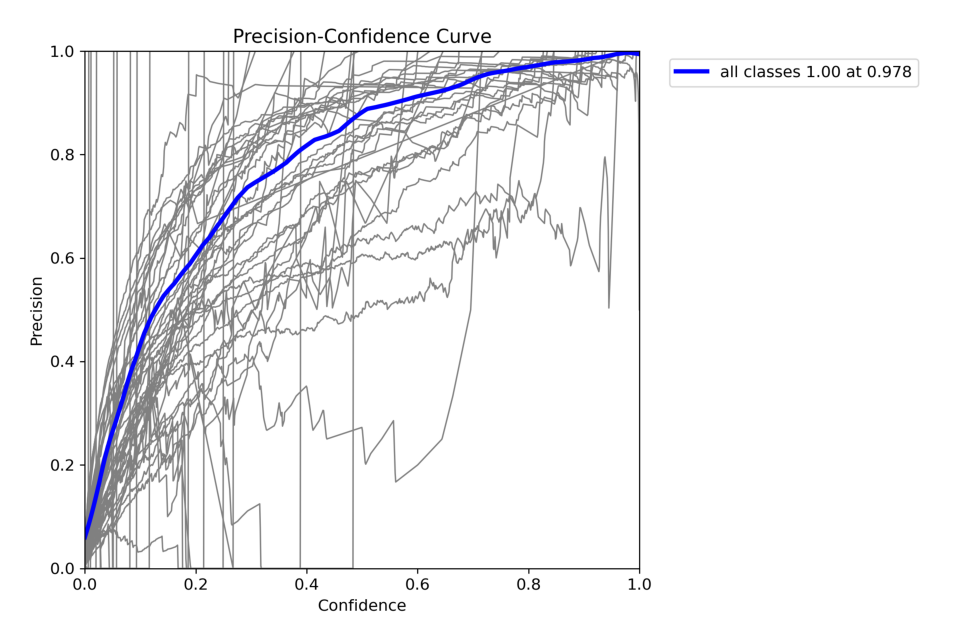

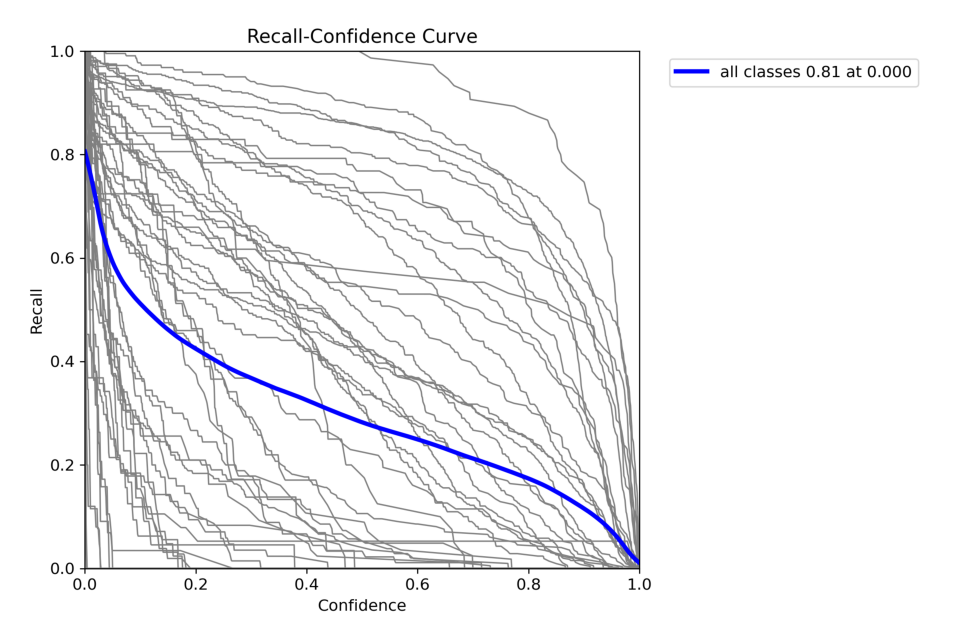

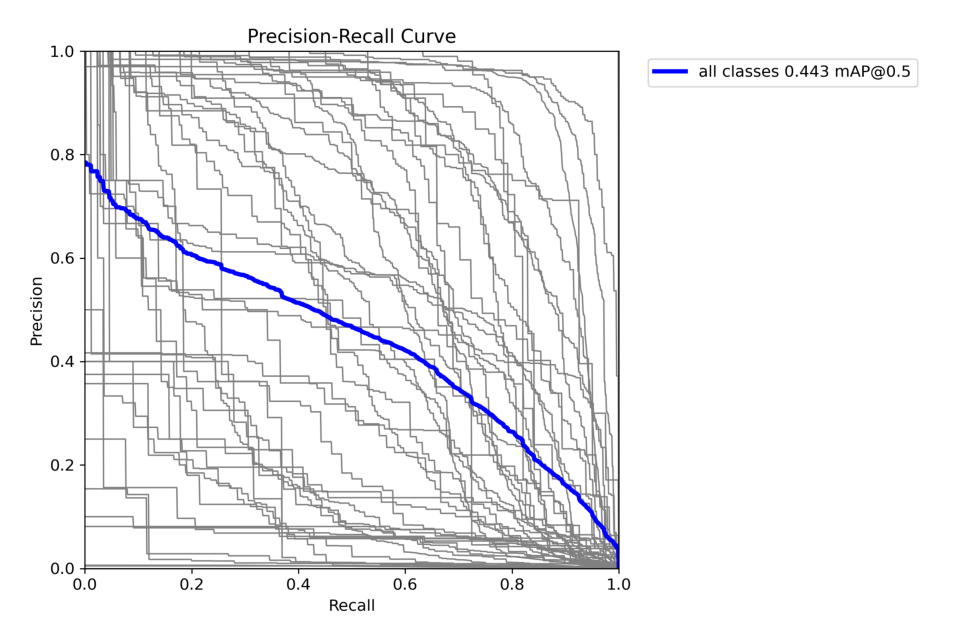

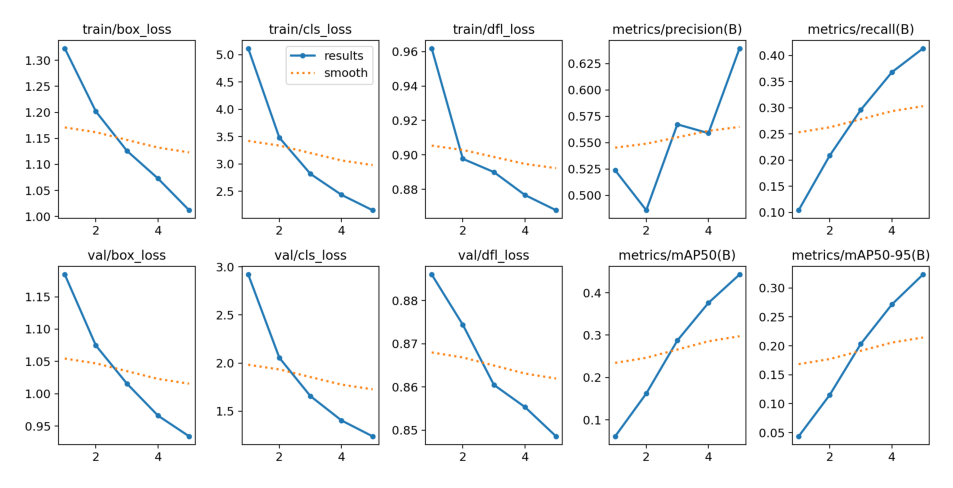

In [ ]:
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/runs/detect/train3'

# Display the images
display_images(post_training_files_path, image_files)

In [ ]:
Result_Final_model = pd.read_csv('/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/runs/detect/train3/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
0                        1                   1.3227                   5.1159   
1                        2                   1.2017                   3.4829   
2                        3                   1.1261                   2.8199   
3                        4                   1.0729                   2.4360   
4                        5                   1.0121                   2.1545   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  0.96184                  0.52376                  0.10431   
1                  0.89770                  0.48589                  0.20880   
2                  0.88999                  0.56735                  0.29609   
3                  0.87665                  0.55897                  0.36795   
4                  0.86782                  0.63936                  0.41342   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.06102                  0.04358                  1.18450   
1                  0.16211                  0.11514                  1.07460   
2                  0.28726                  0.20332                  1.01560   
3                  0.37603                  0.27149                  0.96604   
4                  0.44298                  0.32316                  0.93404   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   2.9208                  0.88605                 0.000060   
1                   2.0550                  0.87443                 0.000097   
2                   1.6563                  0.86050                 0.000110   
3                   1.4029                  0.85535                 0.000074   
4                   1.2377                  0.84857                 0.000038   

                    lr/pg1                   lr/pg2  
0                 0.000060                 0.000060  
1                 0.000097                 0.000097  
2                 0.000110                 0.000110  
3                 0.000074                 0.000074  
4                 0.000038                 0.000038

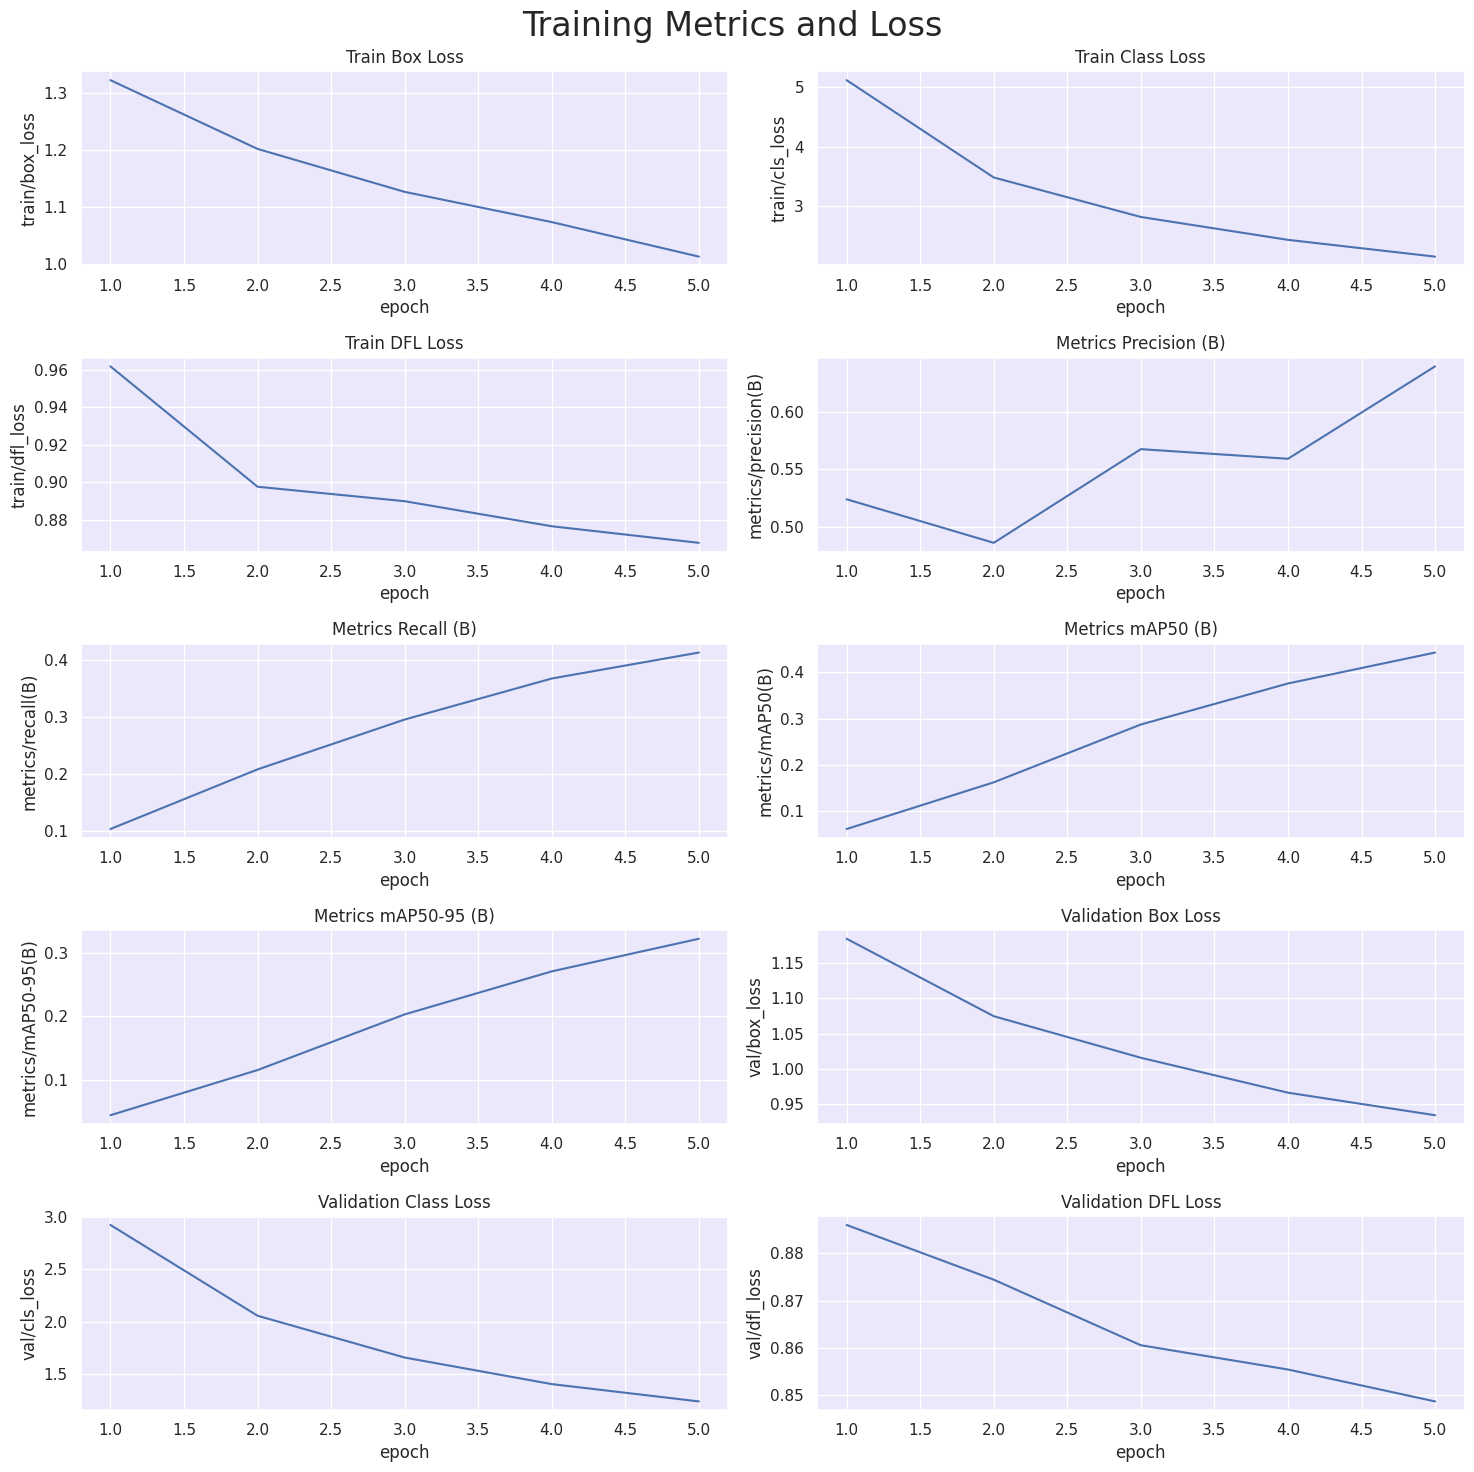

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/runs/detect/train3/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,015,593 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 67.8MB/s]
val: Scanning /content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/data/train/labels.cache... 3216 images, 18 backgrounds, 0 corrupt: 100%|██████████| 3216/3216 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 201/201 [13:35<00:00,  4.06s/it]


                   all       3216       8341      0.639      0.413      0.442      0.323
   Pedestrian Crossing        312        312      0.617      0.842      0.813      0.548
Equal-level Intersection         22         22      0.626     0.0455      0.201      0.104
              No Entry        452        455      0.597      0.642      0.621       0.37
       Right Turn Only        453        453      0.677      0.536      0.593      0.363
          Intersection         32         32          0          0     0.0708     0.0495
Intersection with Uncontrolled Road        257        257      0.506       0.67      0.541      0.384
        Dangerous Turn        268        303      0.483      0.696      0.629      0.447
          No Left Turn        178        178      0.495      0.803      0.781      0.594
              Bus Stop        213        213      0.764      0.718      0.763      0.516
            Roundabout         43         43      0.814      0.209      0.291      0.194
No Sto

In [ ]:
# Đọc dữ liệu huấn luyện từ tệp CSV
log_file_path = '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/runs/detect/train3/results.csv'  # Đảm bảo đường dẫn đúng
logs = pd.read_csv(log_file_path)

# Loại bỏ khoảng trắng ở các tên cột
logs.columns = logs.columns.str.strip()

# Kiểm tra lại cấu trúc của DataFrame
print(logs.head())
print(logs.columns)


   epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1          1.3227          5.1159         0.96184   
1      2          1.2017          3.4829         0.89770   
2      3          1.1261          2.8199         0.88999   
3      4          1.0729          2.4360         0.87665   
4      5          1.0121          2.1545         0.86782   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.52376            0.10431           0.06102   
1               0.48589            0.20880           0.16211   
2               0.56735            0.29609           0.28726   
3               0.55897            0.36795           0.37603   
4               0.63936            0.41342           0.44298   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.04358       1.18450        2.9208       0.88605  0.000060   
1              0.11514       1.07460        2.0550       0.87443  0.000097   
2              0.203

In [ ]:
# Export the model
Valid_model.export(format='onnx')

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 55, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 184.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 263.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 277.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 200.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 220.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to 

'/content/drive/MyDrive/Specialized Projects_KHDL/Train_YOLOv8/runs/detect/train3/weights/best.onnx'